In [2]:
# Zwraca wektor zawierający obliczone ilorazy różnicowe na podstawie podanych węzłów x i ich wartości f
# Metoda 
# f[x1] ----------> f[x1] ----------> f[x1] ----------> f[x1]
#       ↘
# f[x2] -------> f[x1,x2] -------> f[x1,x2] -------> f[x1,x2] 
#       ↘                 ↘
# f[x3] -------> f[x2,x3] ----> f[x1,x2,x3] ----> f[x1,x2,x3] 
#       ↘                 ↘                 ↘ 
# f[x4] -------> f[x3,x4] ----> f[x2,x3,x4] -> f[x1,x2,x3,x4]  
# Ostatnia kolumna jest naszym wynikiem
function ilorazyRoznicowe(x::Vector{Float64}, f::Vector{Float64})
    fx = copy(f)
    n = length(x)

    for i in 2:n
        for j in reverse(i:n)
            fx[j] = (fx[j] - fx[j - 1])/(x[j] - x[j - i + 1])
        end
    end

    return fx
end

ilorazyRoznicowe (generic function with 1 method)

In [3]:
ilorazyRoznicowe([3., 1., 5., 6.], [1., -3., 2., 4.])

4-element Vector{Float64}:
  1.0
  2.0
 -0.375
  0.17500000000000002

In [4]:
# Zwraca wartość wielomianu w postaci Newtona o węzłach x i współczynnikach fx w danym punkcie t
function warNewton(x::Vector{Float64}, fx::Vector{Float64}, t::Float64)
    n = length(fx)
    w = 0
    for i in reverse(1:n)
        w = fx[i] + w * (t - x[i])
    end
    return w
end

warNewton (generic function with 1 method)

In [5]:
# Zamienia wielomian w postaci Newtona w węzłach x i współczynnikach fx na wektor współczynników tego wielomianu w postaci naturalnej
function naturalna(x::Vector{Float64}, fx::Vector{Float64})
    n = length(x)
    array = zeros(n)

    for i in reverse(1:(n-1))
        for j in i:(n-1)
            array[j] -= x[i] * array[j+1]
        end
        array[i] += fx[i]
    end

    return array
end

naturalna (generic function with 1 method)

In [25]:
x = [1., 2., 3., 4.]
f = [1., 4., 9., 16.]

fx = ilorazyRoznicowe(x, f)
println(fx)
natural = naturalna(x, fx)
println(natural)

[1.0, 3.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


In [21]:
using Plots

# Rysuje zadaną funkcję i jej wielomian interpolacyjny stopnia n (o równoodległych węzłach) na przedziale [a,b]
function rysujNnfx(f,a::Float64,b::Float64,n::Int)
    h = (b - a)/n
    x = [xi for xi in range(a,b, n + 1)]
    #x = a .+ ((b - a) .* (1 .+ [cos(((2*j + 1) * π)/(2*(n + 1))) for j in 0:n]) ./ 2)
    fx = ilorazyRoznicowe(x, f.(x))

    xd = range(a,b,200)
    fd = [f(t) for t in xd]
    pd = [warNewton(x, fx, t) for t in xd]
    plt = plot(xd, [fd pd], labels = ["Funkcja" "Interpolacja"])
    return plt
end

rysujNnfx (generic function with 1 method)

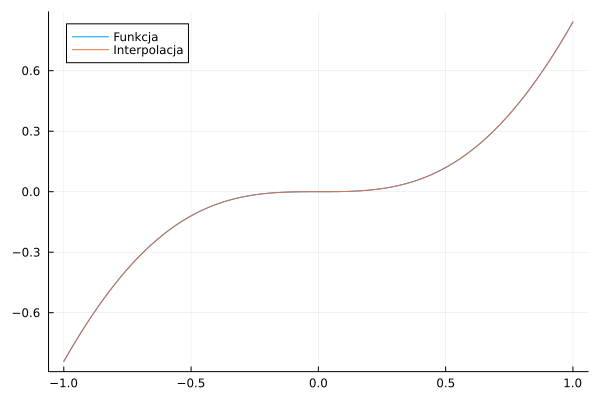

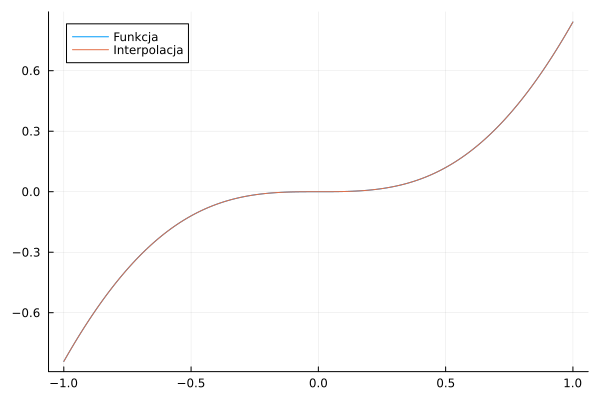

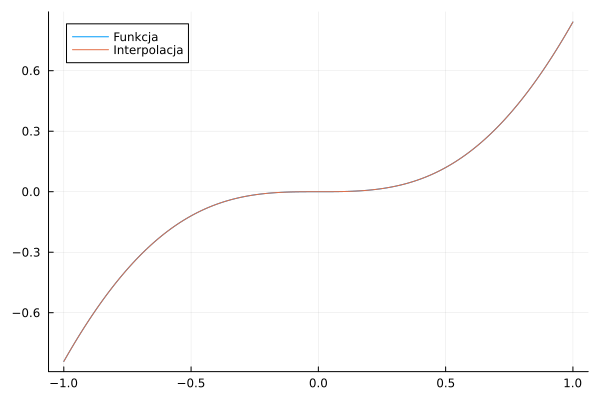

In [17]:
g(x) = sin(x) * x^2
for i in [5,10,15]
    plt = rysujNnfx(g, -1.0, 1.0, i)
    display(plt)
    savefig(plt, "./plots/sinx_$(i).svg")
end

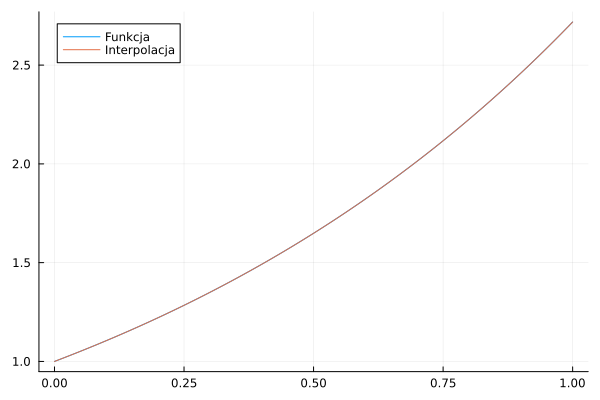

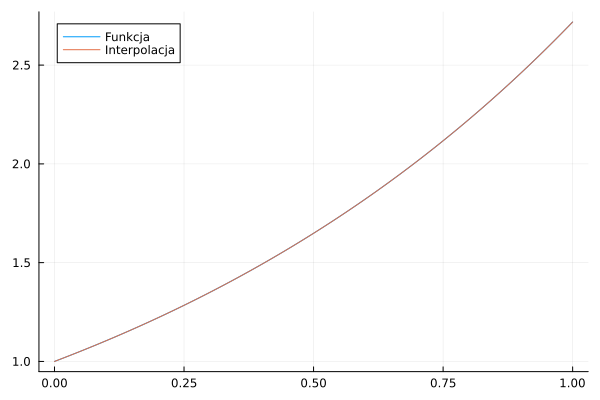

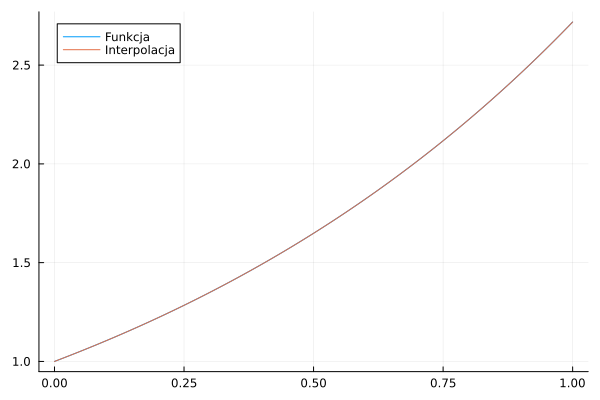

In [18]:
g(x) = ℯ^x
for i in [5,10,15]
    plt = rysujNnfx(g, 0.0, 1.0, i)
    display(plt)
    savefig(plt, "./plots/ex_$(i).svg")
end

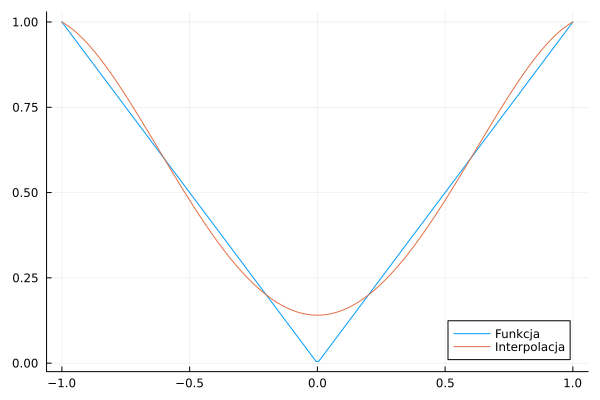

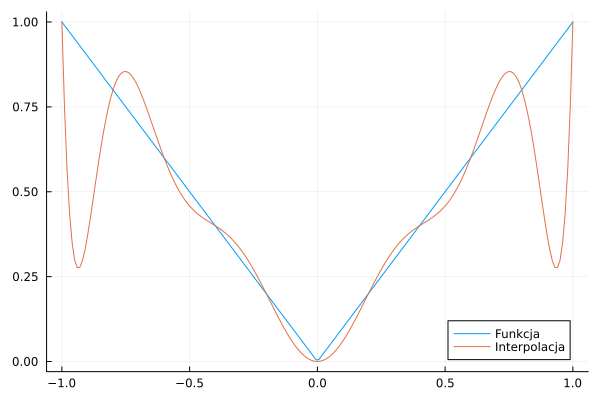

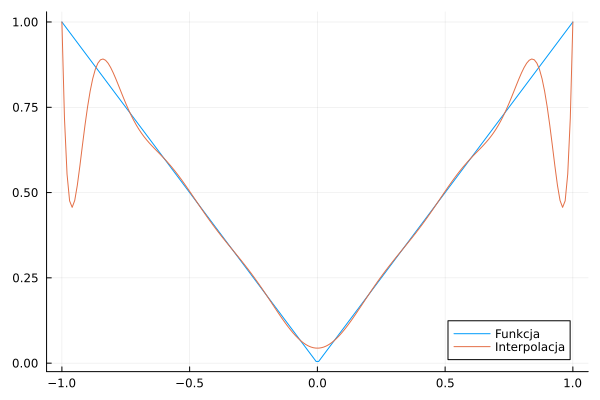

In [19]:
g(x) = abs(x)
for i in [5,10,15]
    plt = rysujNnfx(g, -1.0, 1.0, i)
    display(plt)
    savefig(plt, "./plots/absx_$(i).svg")
end

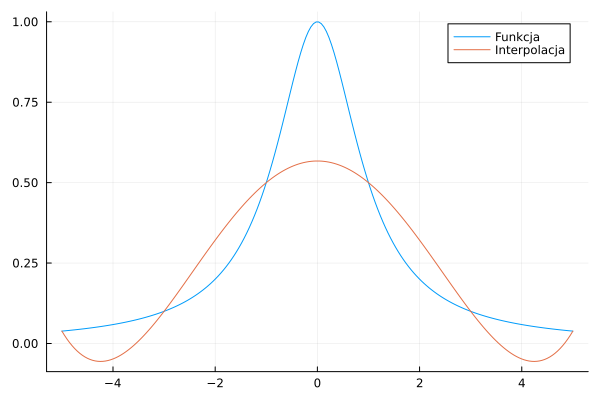

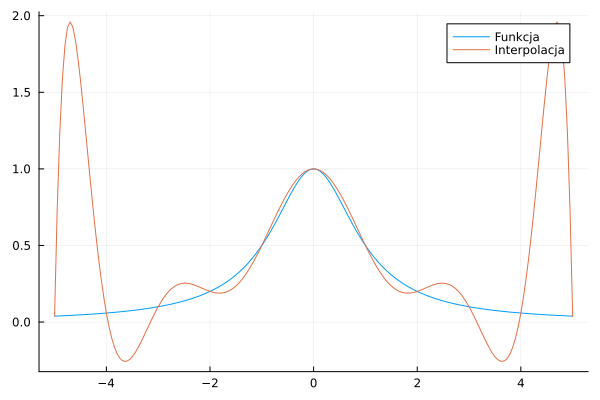

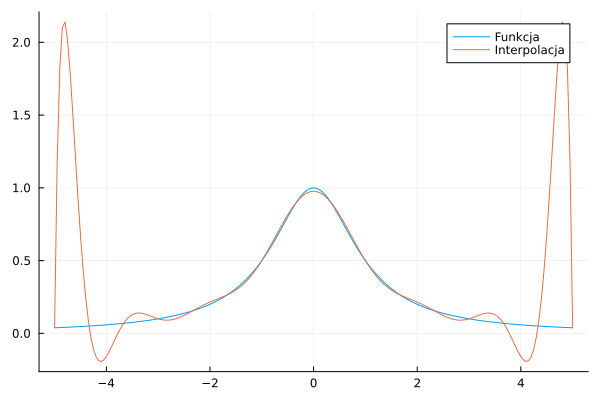

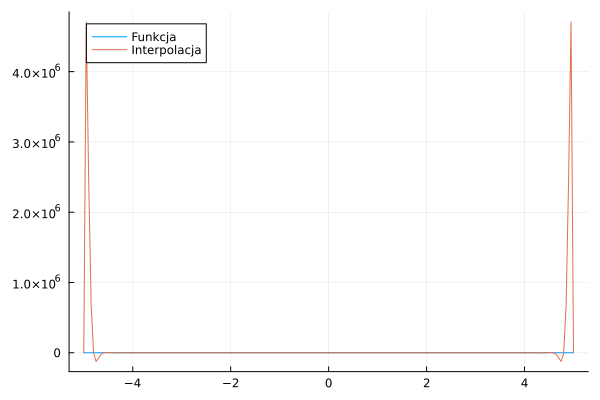

In [20]:
g(x) = 1.0/(1.0 + x^2)
for i in [5,10,15]
    plt = rysujNnfx(g, -5.0, 5.0, i)
    display(plt)
    savefig(plt, "./plots/1x2_$(i).svg")
end

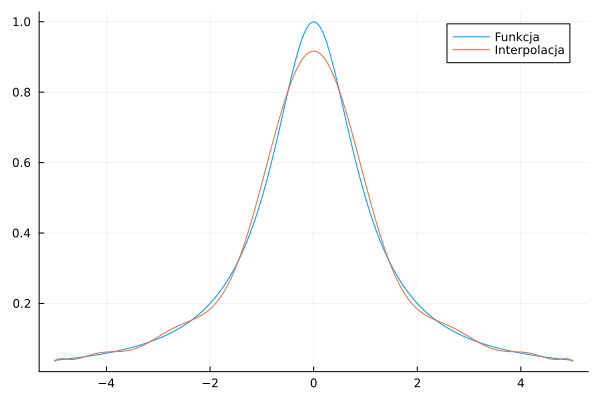

In [24]:
g(x) = 1.0/(1.0 + x^2)
for i in [15]
    plt = rysujNnfx(g, -5.0, 5.0, i)
    display(plt)
    savefig(plt, "./plots/1x2_cz$(i).svg")
end